In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data = pd.read_csv('STA160_Midterm_Data_Processed.csv', dtype={'Response': str})

In [3]:
data_nodisease = data[data["Response"] != "000"]
data_nodisease

HighBP  HighChol  CholCheck   BMI  Smoker  PhysActivity  Fruits  \
8          1.0       1.0        1.0  30.0     1.0           0.0     1.0   
10         0.0       0.0        1.0  25.0     1.0           1.0     1.0   
13         1.0       1.0        1.0  28.0     0.0           0.0     0.0   
14         0.0       1.0        1.0  33.0     1.0           1.0     0.0   
17         0.0       0.0        1.0  23.0     1.0           1.0     0.0   
...        ...       ...        ...   ...     ...           ...     ...   
253670     1.0       1.0        1.0  25.0     0.0           0.0     1.0   
253671     1.0       1.0        1.0  23.0     0.0           0.0     0.0   
253672     1.0       0.0        1.0  30.0     1.0           1.0     1.0   
253676     1.0       1.0        1.0  18.0     0.0           0.0     0.0   
253679     1.0       1.0        1.0  25.0     0.0           1.0     1.0   

        Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  \
8           1.0                0.0            1.0          0.0      5.0   
10          1.0                0.0            1.0          0.0      3.0   
13          1.0                0.0            1.0          0.0      4.0   
14          1.0                0.0            1.0          1.0      4.0   
17          0.0                0.0            1.0          0.0      2.0   
...         ...                ...            ...          ...      ...   
253670      0.0                0.0            1.0          0.0      5.0   
253671      0.0                0.0            1.0          1.0      4.0   
253672      1.0                0.0            1.0          0.0      3.0   
253676      0.0                0.0            1.0          0.0      4.0   
253679      0.0                0.0            1.0          0.0      2.0   

        MentHlth  PhysHlth  DiffWalk     Sex    Age  \
8           30.0      30.0       1.0  Female  60-64   
10           0.0       0.0       0.0    Male    80+   
13           0.0       0.0       1.0  Female  70-74   
14          30.0      28.0       0.0  Female  35-39   
17           0.0       0.0       0.0    Male  50-54   
...          ...       ...       ...     ...    ...   
253670      15.0       0.0       1.0  Female    80+   
253671       0.0       5.0       0.0    Male  55-59   
253672       0.0       0.0       0.0    Male  75-79   
253676       0.0       0.0       1.0  Female  70-74   
253679       0.0       0.0       0.0  Female  60-64   

                               Education           Income Response  
8       Some college or technical school       $0-$10,000      101  
10                      College graduate         $75,000+      001  
13                  High school graduate  $35,000-$50,000      001  
14                      College graduate  $10,000-$15,000      010  
17      Some college or technical school  $35,000-$50,000      001  
...                                  ...              ...      ...  
253670                  College graduate  $20,000-$25,000      101  
253671                  Some high school  $10,000-$15,000      110  
253672                        Elementary       $0-$10,000      100  
253676                        Elementary  $20,000-$25,000      001  
253679                  College graduate  $10,000-$15,000      101  

[56084 rows x 20 columns]

In [23]:
pd.crosstab([data.Age, data.Response], data.GenHlth, margins = False)

GenHlth          1.0   2.0   3.0  4.0  5.0
Age   Response                            
18-24 000       1457  2280  1465  335   43
      001          5    26    22   18    4
      010          2     5     3    4    2
      100          4     5     8    5    1
      101          0     0     0    0    1
...              ...   ...   ...  ...  ...
80+   011          9    38    69   59   27
      100        168   570   891  623  291
      101         27   124   265  280  158
      110         17    86   170  156   98
      111          3    19    76   65   72

[103 rows x 5 columns]

In [3]:
pd.crosstab(data.Response, [data.GenHlth,data.HighChol], margins = False)

GenHlth     1.0           2.0           3.0          4.0         5.0      
HighChol    0.0    1.0    0.0    1.0    0.0    1.0   0.0   1.0   0.0   1.0
Response                                                                  
000       32330  10648  50881  27386  32469  22491  8902  7675  2485  2329
001         450    501   2250   3149   3825   6794  2140  4443   684  1600
010         180    134    507    586    702    939   464   640   219   352
011          22     18     72    125    161    351   140   438    66   239
100         363    436   1060   2000   1530   3401  1054  2293   534  1043
101          29     97    190    504    505   1458   473  1611   299  1076
110          33     35    107    176    224    433   219   533   166   375
111           9     14     25     66     98    265   118   427   104   510

In [6]:
highchol_bp = pd.crosstab(data.Response, [data.HighBP,data.HighChol], margins = False)
highchol_bp

HighBP      0.0           1.0       
HighChol    0.0    1.0    0.0    1.0
Response                            
000       94336  35359  32731  35170
001        3632   3630   5717  12857
010         948    699   1124   1952
011         128    154    333   1017
100        2071   2153   2470   7020
101         418    585   1078   4161
110         296    247    453   1305
111          91    104    263   1178

In [6]:
pd.crosstab(data.Response, [data.HighBP,data.HighChol], margins = True)

HighBP       0.0           1.0            All
HighChol     0.0    1.0    0.0    1.0        
Response                                     
000        94336  35359  32731  35170  197596
001         3632   3630   5717  12857   25836
010          948    699   1124   1952    4723
011          128    154    333   1017    1632
100         2071   2153   2470   7020   13714
101          418    585   1078   4161    6242
110          296    247    453   1305    2301
111           91    104    263   1178    1636
All       101920  42931  44169  64660  253680

Text(0.5, 1.0, 'Heatmap of Contingency Table')

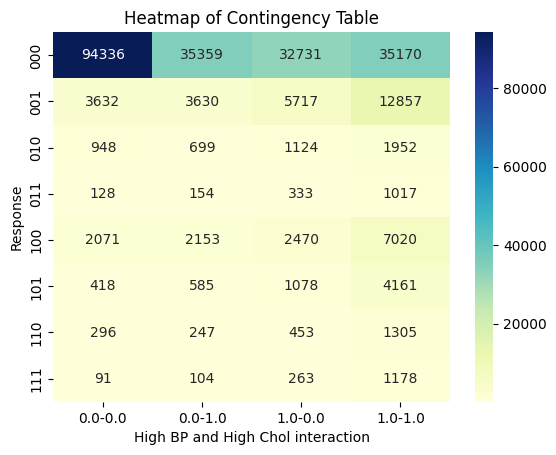

In [7]:
sns.heatmap(highchol_bp, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("High BP and High Chol interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table")

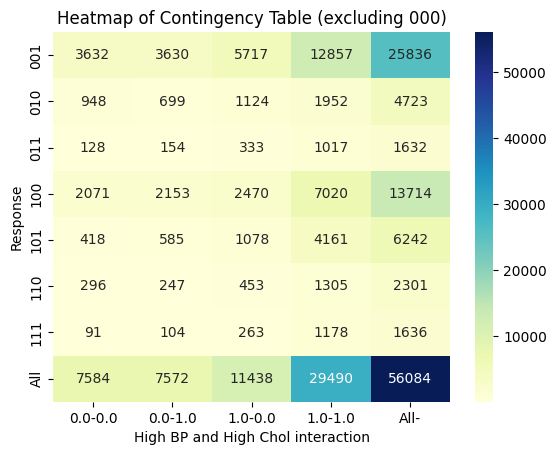

In [7]:
highchol_bp_no = pd.crosstab(data_nodisease.Response, [data_nodisease.HighBP,data_nodisease.HighChol], margins = True)

sns.heatmap(highchol_bp_no, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("High BP and High Chol interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (excluding 000)")
plt.show()

In [11]:
data['Age'].unique()

array(['60-64', '50-54', '70-74', '65-69', '55-59', '80+', '35-39',
       '45-49', '25-29', '75-79', '40-44', '18-24', '30-34'], dtype=object)

In [9]:
age1 = data_nodisease[data_nodisease['Age'].isin(['18-24', '25-29', '30-34','35-39'])]
age2 = data_nodisease[data_nodisease['Age'].isin(['40-44','45-49','50-54','54-60','60-64'])]
age3 = data_nodisease[data_nodisease['Age'].isin(['65-70','70-74','75-79','80+'])]

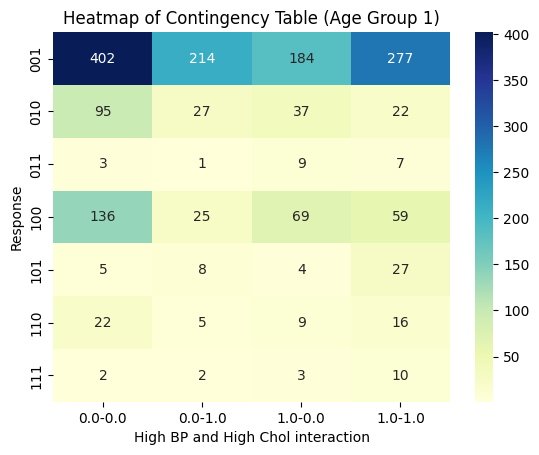

In [11]:
highchol_bp_age1 = pd.crosstab(age1.Response, [age1.HighBP,age1.HighChol], margins = False)

sns.heatmap(highchol_bp_age1, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("High BP and High Chol interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 1)")
plt.show()

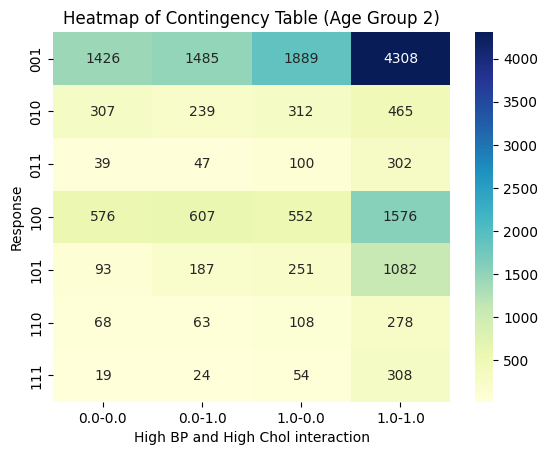

In [20]:
highchol_bp_age2 = pd.crosstab(age2.Response, [age2.HighBP,age2.HighChol], margins = False)

sns.heatmap(highchol_bp_age2, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("High BP and High Chol interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 2)")
plt.show()

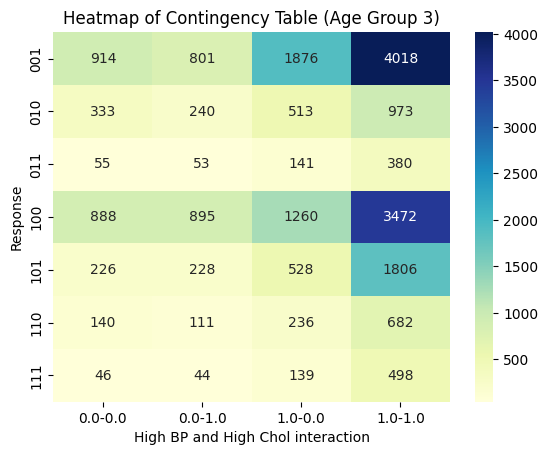

In [22]:
highchol_bp_age3 = pd.crosstab(age3.Response, [age3.HighBP,age3.HighChol], margins = False)

sns.heatmap(highchol_bp_age3, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("High BP and High Chol interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 3)")
plt.show()

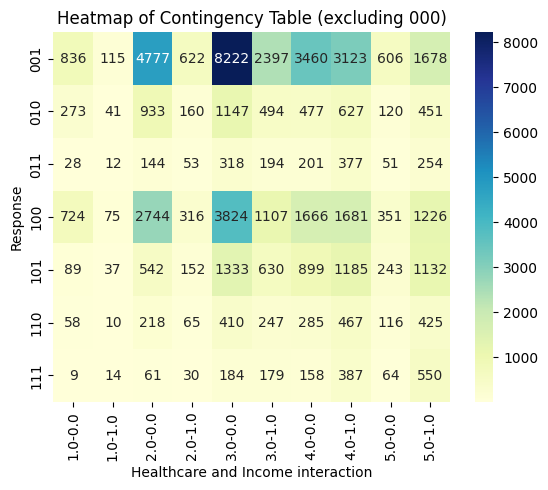

In [28]:
genhlth_walk = pd.crosstab(data_nodisease.Response, [data_nodisease.GenHlth,data_nodisease.DiffWalk], margins = False)

sns.heatmap(genhlth_walk, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("General Health and Difficulty Walking interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (excluding 000)")
plt.show()

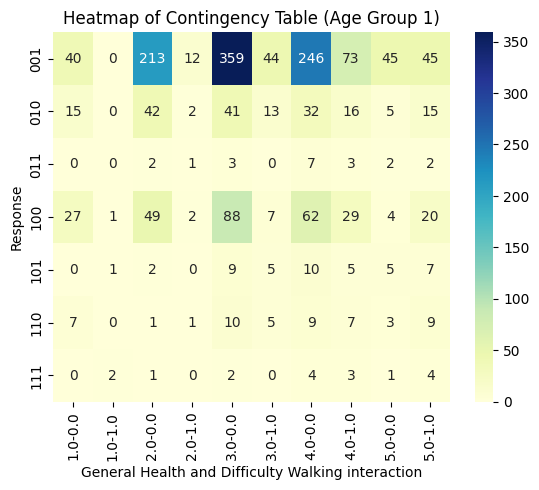

In [30]:
genhlth_walk_age1 = pd.crosstab(age1.Response, [age1.GenHlth,age1.DiffWalk], margins = False)

sns.heatmap(genhlth_walk_age1, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("General Health and Difficulty Walking interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 1)")
plt.show()

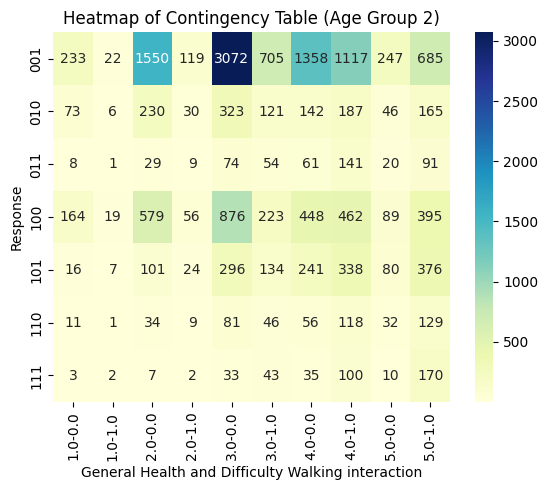

In [31]:
genhlth_walk_age2 = pd.crosstab(age2.Response, [age2.GenHlth,age2.DiffWalk], margins = False)

sns.heatmap(genhlth_walk_age2, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("General Health and Difficulty Walking interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 2)")
plt.show()

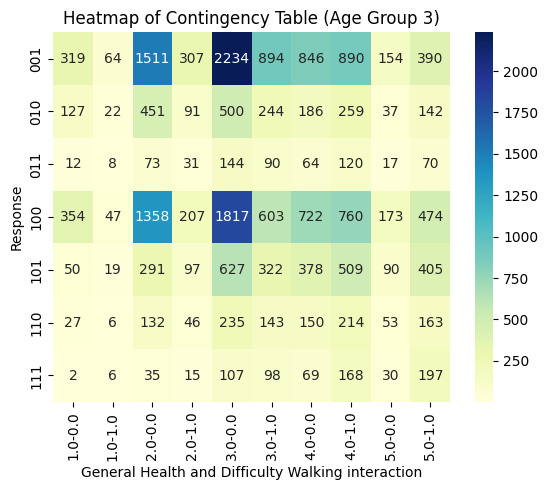

In [32]:
genhlth_walk_age3 = pd.crosstab(age3.Response, [age3.GenHlth,age3.DiffWalk], margins = False)

sns.heatmap(genhlth_walk_age3, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("General Health and Difficulty Walking interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 3)")
plt.show()

In [50]:
def cond_entropy_interaction(data, y, a, b):
    cross = pd.crosstab(data[y], [data[a], data[b]], margins=True, normalize='all')

    num_response = cross.shape[0] - 1
    num_cat = cross.shape[1] - 1

    ce_sum = 0

    for i in range(num_response):
        for j in range(num_cat):
            if cross.iloc[i, j] != 0:
                ce_sum += cross.iloc[i, j] * np.log2(cross.iloc[i, j] / cross.iloc[num_response, j])

    return -ce_sum

In [51]:
cond_entropy_interaction(data, 'Response', 'GenHlth', 'DiffWalk')

1.1167778067375773

In [52]:
def entropy(data, y):
    probs = list(data[y].value_counts(normalize=True))

    n = len(probs)

    e_sum = 0

    for i in range(n):
        if probs[i] != 0:
            e_sum += probs[i] * np.log2(probs[i])

    return -e_sum

In [53]:
response_entropy = entropy(data, 'Response')

In [55]:
columns = list(data.columns)
categorical_vars = columns[:3] + columns[4:-1]

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [57]:
import itertools

variable_pairs = list(itertools.combinations(categorical_vars, 2))

conditional_entropies_int = {f'{var1}_{var2}': cond_entropy_interaction(data, 'Response', var1, var2)
                         for var1, var2 in variable_pairs}

In [72]:
sorted_cond_ent_int = dict(sorted(conditional_entropies_int.items(), key=lambda x: x[1], reverse = False)[:15])

In [70]:
sorted_cond_ent_int

{'GenHlth_Age': 1.067313739247511,
 'HighBP_GenHlth': 1.0855682180961652,
 'HighChol_GenHlth': 1.0998879682328362,
 'GenHlth_DiffWalk': 1.1167778067375773,
 'HighBP_Age': 1.11839654230592,
 'GenHlth_Income': 1.1208887592863932,
 'GenHlth_Sex': 1.1215569268393366,
 'PhysHlth_Age': 1.121764578556096,
 'HighBP_DiffWalk': 1.1224046411964526,
 'GenHlth_MentHlth': 1.1236014735942317}

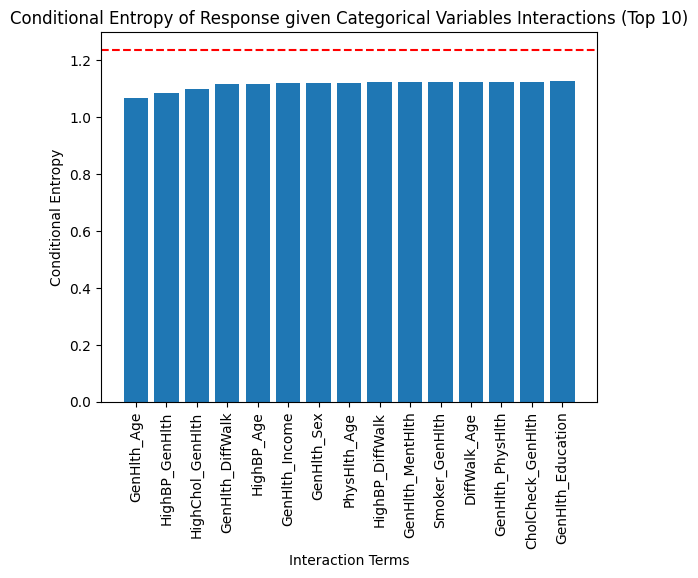

In [73]:
# bar plot of conditional entropy (interaction terms)
plt.bar(sorted_cond_ent_int.keys(), sorted_cond_ent_int.values())
plt.title('Conditional Entropy of Response given Categorical Variables Interactions (Top 15)')
plt.xlabel('Interaction Terms')
plt.ylabel('Conditional Entropy')
plt.xticks(rotation=90)
# line for CE[Y]
plt.axhline(y=response_entropy, color='r', linestyle='--')
plt.show()

In [74]:
# mutual information
mutual_information = {var: response_entropy - cond_en for var, cond_en in conditional_entropies_int.items()}

In [75]:
sorted_mutual_information = dict(sorted(mutual_information.items(), key=lambda item: item[1], reverse=True)[:15])

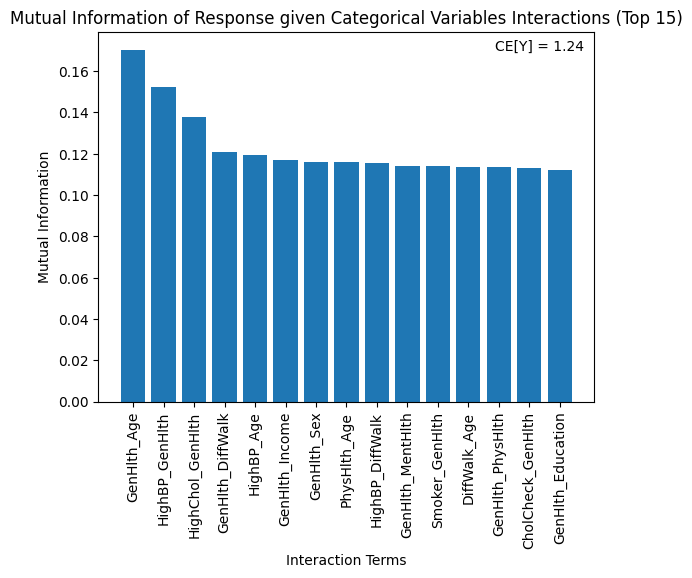

In [76]:
# bar plot of mutual information
plt.bar(sorted_mutual_information.keys(), sorted_mutual_information.values())
plt.title('Mutual Information of Response given Categorical Variables Interactions (Top 15)')
plt.xlabel('Interaction Terms')
plt.ylabel('Mutual Information')
plt.xticks(rotation=90)
plt.annotate(f'CE[Y] = {response_entropy:.2f}', xy=(0, 0), xytext=(0.8, 0.95), textcoords='axes fraction')
plt.show()

In [134]:
fig = px.histogram(data_nodisease, x='GenHlth', 
                   color='Age',
                  title = "Frequency not including 000").update_layout(xaxis_title="GenHlth",
                                                                       yaxis_title="Count")
fig.update_xaxes(categoryorder='array', categoryarray= sorted(data['Age'].unique()))
fig.show()

In [135]:
fig = px.histogram(age1, x='GenHlth',
                  title = "Frequency not including 000, Age Group 1").update_layout(xaxis_title="GenHlth",
                                                                       yaxis_title="Count")
fig.update_xaxes(categoryorder='array', categoryarray= sorted(data['Age'].unique()))
fig.show()

In [137]:
fig = px.histogram(age2, x='GenHlth',
                  title = "Frequency not including 000, Age Group 2").update_layout(xaxis_title="GenHlth",
                                                                       yaxis_title="Count")
fig.update_xaxes(categoryorder='array', categoryarray= sorted(data['Age'].unique()))
fig.show()

In [138]:
fig = px.histogram(age1, x='GenHlth',
                  title = "Frequency not including 000, Age Group 3").update_layout(xaxis_title="GenHlth",
                                                                       yaxis_title="Count")
fig.update_xaxes(categoryorder='array', categoryarray= sorted(data['Age'].unique()))
fig.show()

In [142]:
fig = px.histogram(x=data_nodisease['GenHlth'], 
                   color=data_nodisease['HighBP'],
                  title = "GenHlth and HighBP interaction").update_layout(xaxis_title="GenHlth",yaxis_title="Count")

fig.show()

In [162]:
fig = px.histogram(age1, x='GenHlth', 
                   color='HighBP',
                   category_orders={'HighBP':[1,0]},
                  title = "GenHlth and HighBP interaction, Age Group 1").update_layout(xaxis_title="GenHlth",
                                                                                    yaxis_title="Count")

fig.show()

In [160]:
fig = px.histogram(age2, x='GenHlth', 
                   color='HighBP',
                  title = "Frequency not including 000, Age Group 2").updte_layout(xaxis_title="GenHlth",
                                                                       yaxis_title="Count")

fig.show()

In [163]:
fig = px.histogram(age3, x='GenHlth', 
                   color='HighBP',
                   category_orders={'HighBP':[1,0]},
                  title = "GenHlth and HighBP interaction, Age Group 3").update_layout(xaxis_title="GenHlth",
                                                                       yaxis_title="Count")

fig.show()

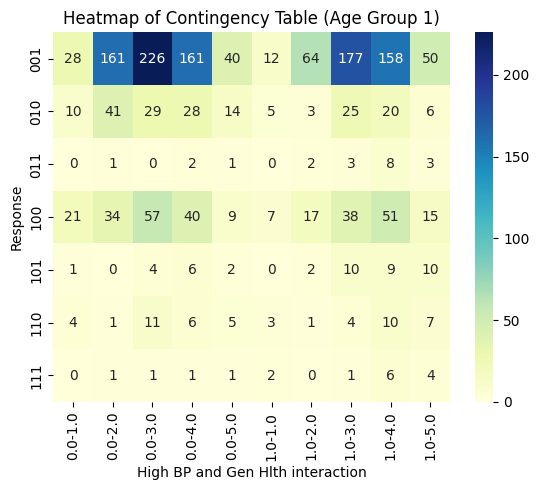

In [173]:
genhlth_bp_age1 = pd.crosstab(age1.Response, [age1.HighBP,age1.GenHlth], margins = False)

sns.heatmap(genhlth_bp_age1, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("High BP and Gen Hlth interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 1)")
plt.show()

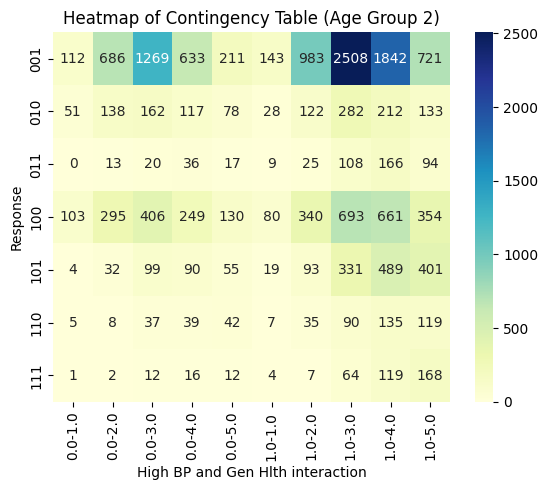

In [172]:
genhlth_bp_age = pd.crosstab(age2.Response, [age2.HighBP,age2.GenHlth], margins = False)

sns.heatmap(genhlth_bp_age, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("High BP and Gen Hlth interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 2)")
plt.show()

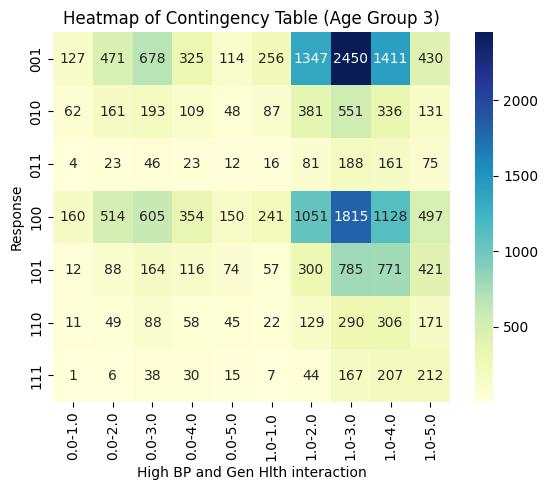

In [174]:
genhlth_bp_age1 = pd.crosstab(age3.Response, [age3.HighBP,age3.GenHlth], margins = False)

sns.heatmap(genhlth_bp_age1, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("High BP and Gen Hlth interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 3)")
plt.show()

In [148]:
fig = px.histogram(data_nodisease, x='GenHlth',
                   color='DiffWalk',
                  title="GenHlth and DiffWalk interaction").update_layout(xaxis_title="GenHlth",yaxis_title="Count")

fig.show()

In [164]:
fig = px.histogram(age1, x='GenHlth',
                   color='DiffWalk',
                   category_orders={'DiffWalk':[1,0]},
                  title="GenHlth and DiffWalk interaction, Age Group 1").update_layout(xaxis_title="GenHlth",
                                                                          yaxis_title="Count")

fig.show()

In [165]:
fig = px.histogram(age2, x='GenHlth',
                   color='DiffWalk',
                  title="GenHlth and DiffWalk interaction, Age Group 2").update_layout(xaxis_title="GenHlth",
                                                                          yaxis_title="Count")

fig.show()

In [167]:
fig = px.histogram(age3, x='GenHlth',
                   color='DiffWalk',
                   category_orders={'DiffWalk':[1,0]},
                  title="GenHlth and DiffWalk interaction, Age Group 3").update_layout(xaxis_title="GenHlth",
                                                                          yaxis_title="Count")

fig.show()

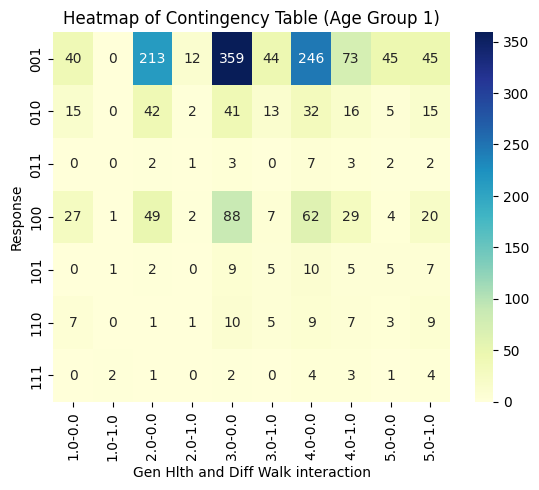

In [175]:
genhlth_diffwalk = pd.crosstab(age1.Response, [age1.GenHlth,age1.DiffWalk], margins = False)

sns.heatmap(genhlth_diffwalk, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("Gen Hlth and Diff Walk interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 1)")
plt.show()

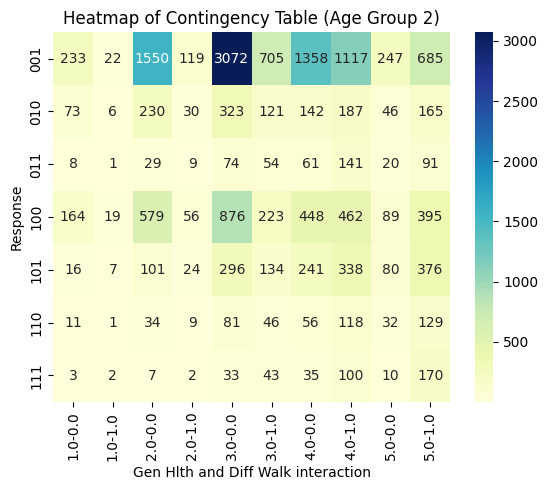

In [176]:
genhlth_diffwalk = pd.crosstab(age2.Response, [age2.GenHlth,age2.DiffWalk], margins = False)

sns.heatmap(genhlth_diffwalk, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("Gen Hlth and Diff Walk interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 2)")
plt.show()

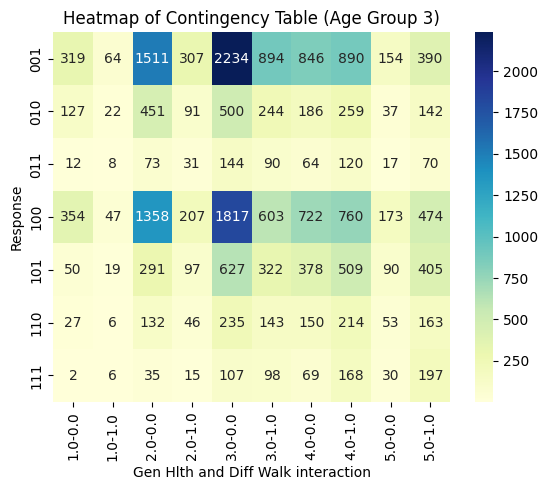

In [177]:
genhlth_diffwalk = pd.crosstab(age3.Response, [age3.GenHlth,age3.DiffWalk], margins = False)

sns.heatmap(genhlth_diffwalk, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("Gen Hlth and Diff Walk interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 3)")
plt.show()

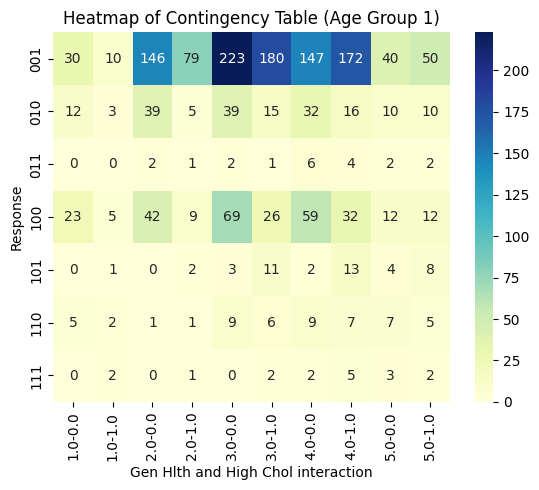

In [181]:
genhlth_highchol = pd.crosstab(age1.Response, [age1.GenHlth,age1.HighChol], margins = False)

sns.heatmap(genhlth_highchol, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("Gen Hlth and High Chol interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 1)")
plt.show()

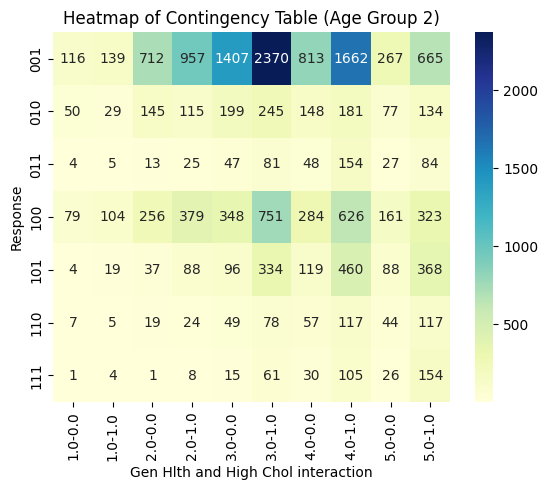

In [183]:
genhlth_highchol = pd.crosstab(age2.Response, [age2.GenHlth,age2.HighChol], margins = False)

sns.heatmap(genhlth_highchol, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("Gen Hlth and High Chol interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 2)")
plt.show()

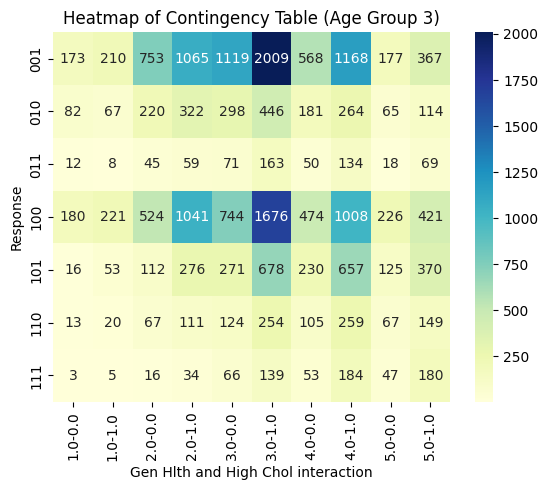

In [184]:
genhlth_highchol = pd.crosstab(age3.Response, [age3.GenHlth,age3.HighChol], margins = False)

sns.heatmap(genhlth_highchol, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel("Gen Hlth and High Chol interaction")
plt.ylabel("Response")
plt.title("Heatmap of Contingency Table (Age Group 3)")
plt.show()

In [97]:
def odds_ratio_interaction(data, a, b, y):
    # odds ratio vs 000 
    cross = pd.crosstab([data[a], data[b]], data[y])

    num_response = cross.shape[1] - 1
    num_category = cross.shape[0] - 1

    odds_ratios = []

    for i in range(1, num_response):
        for j in range(1, num_category):
            odds_ratios.append((cross.iloc[j, i] / cross.iloc[j, 0]) / (cross.iloc[0, i] / cross.iloc[0, 0]))

    odds_ratios = dict(zip(cross.columns[1:], odds_ratios))

    odds_ratios_df = pd.DataFrame(odds_ratios.items(), columns=['Response', 'Odds Ratio'])

    return odds_ratios_df

C:\Users\Treasurer Tsang\AppData\Local\Temp\ipykernel_22928\3691537570.py:12: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Treasurer Tsang\AppData\Local\Temp\ipykernel_22928\3691537570.py:12: RuntimeWarning:

divide by zero encountered in double_scalars



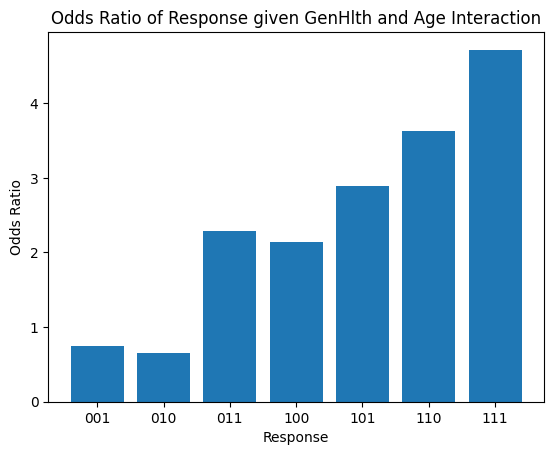

In [98]:
# vs odds of GenHlth = 1 and Age = 18-24
high_bp_odds_ratios = odds_ratio_interaction(data, 'GenHlth', 'Age', 'Response')
plt.bar(high_bp_odds_ratios['Response'], high_bp_odds_ratios['Odds Ratio'])
plt.title('Odds Ratio of Response given GenHlth and Age Interaction')
plt.xlabel('Response')
plt.ylabel('Odds Ratio')
plt.xticks(rotation=0)
plt.show()

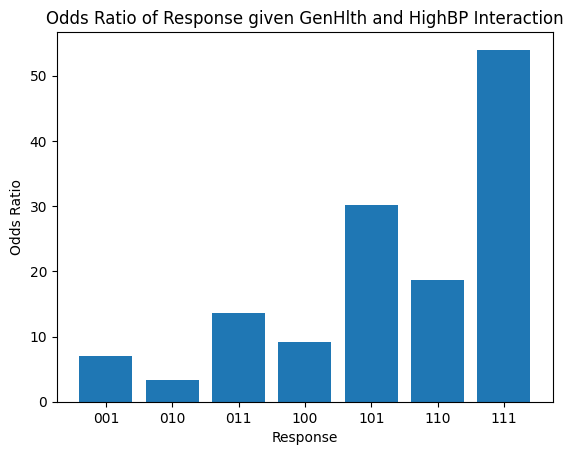

In [179]:
# vs odds of GenHlth = 1 and HighBP = 0
high_bp_odds_ratios = odds_ratio_interaction(data, 'GenHlth', 'HighBP', 'Response')
plt.bar(high_bp_odds_ratios['Response'], high_bp_odds_ratios['Odds Ratio'])
plt.title('Odds Ratio of Response given GenHlth and HighBP Interaction')
plt.xlabel('Response')
plt.ylabel('Odds Ratio')
plt.xticks(rotation=0)
plt.show()

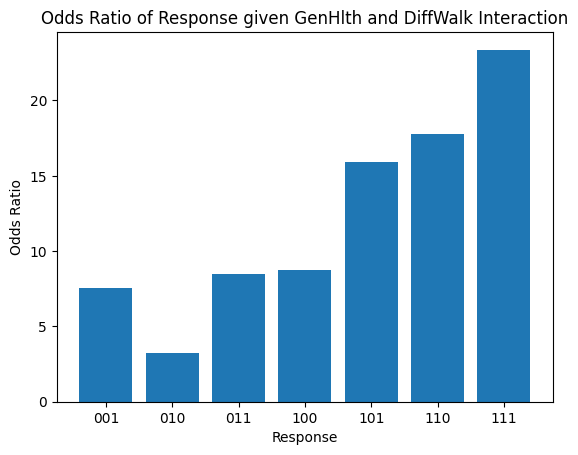

In [180]:
# vs odds of GenHlth = 1 and DiffWalk = 0
high_bp_odds_ratios = odds_ratio_interaction(data, 'GenHlth', 'DiffWalk', 'Response')
plt.bar(high_bp_odds_ratios['Response'], high_bp_odds_ratios['Odds Ratio'])
plt.title('Odds Ratio of Response given GenHlth and DiffWalk Interaction')
plt.xlabel('Response')
plt.ylabel('Odds Ratio')
plt.xticks(rotation=0)
plt.show()